In [74]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.linalg import pinvh
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load dataset from CSV
file_path = "cars.csv"  # Replace with your actual CSV file path
data = pd.read_csv(file_path)


In [8]:
data = data.dropna()

In [13]:

# Ensure numeric columns only
data_numeric = data.select_dtypes(include=[np.number])


In [14]:
data_numeric 

,year,selling_price,km_driven
0,2014,450000,145500
1,2014,370000,120000
2,2006,158000,140000
3,2010,225000,127000
4,2007,130000,120000
...,...,...,...
8123,2013,320000,110000
8124,2007,135000,119000
8125,2009,382000,120000
8126,2013,290000,25000


In [53]:

# Compute mean and covariance matrix
mean_vector = data_numeric.mean().values
cov_matrix = data_numeric.cov().values


In [61]:
cov_matrix

array([[ 1.63559480e+01,  1.35022491e+06, -9.55997512e+04],
       [ 1.35022491e+06,  6.50044551e+11, -1.02830035e+10],
       [-9.55997512e+04, -1.02830035e+10,  3.19796527e+09]])

In [66]:
epsilon = 1e-1 # Small regularization term
cov_matrix += np.eye(cov_matrix.shape[0]) + epsilon

In [67]:
cov_matrix

array([[2.10001736e+00, 1.00001000e-01, 1.00001000e-01],
       [1.00001000e-01, 6.50046651e+05, 1.00001000e-01],
       [1.00001000e-01, 1.00001000e-01, 3.20006527e+03]])

In [16]:
mean_vector

array([  2013.80401083, 638271.80770177,  69819.51082677])

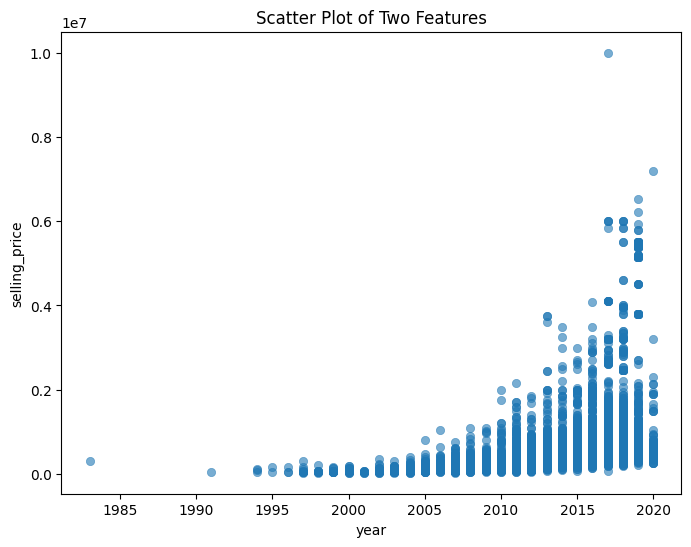

In [75]:
# 📌 Scatter Plot for Two Features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_numeric.iloc[:, 0], y=data_numeric.iloc[:, 1], alpha=0.6, edgecolor=None)
plt.xlabel(data_numeric.columns[0])
plt.ylabel(data_numeric.columns[1])
plt.title("Scatter Plot of Two Features")
plt.show()

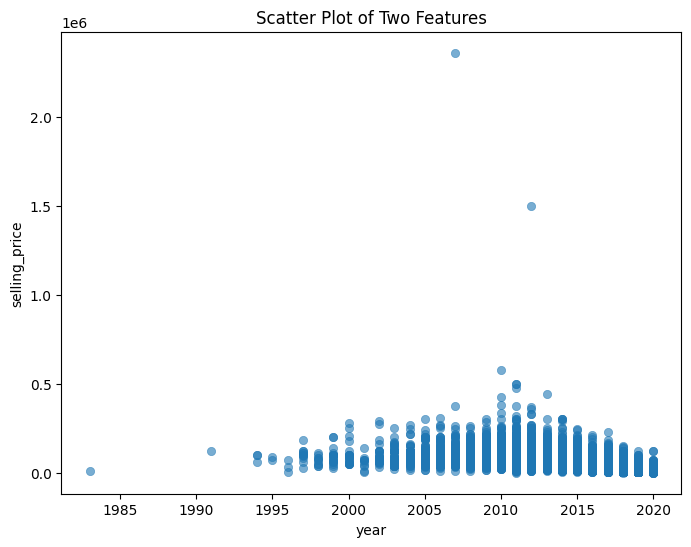

In [98]:
# 📌 Scatter Plot for Two Features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_numeric['year'], y=data_numeric['km_driven'], alpha=0.6, edgecolor=None)
plt.xlabel(data_numeric.columns[0])
plt.ylabel(data_numeric.columns[1])
plt.title("Scatter Plot of Two Features")
plt.show()

In [89]:
# # 📌 Pairplot (Scatter Matrix) for All Numeric Features
# sns.pairplot(data_numeric, diag_kind="kde")  # KDE for diagonal distribution
# plt.show()

In [90]:
# # 📌 Hexbin Plot (Density Visualization)
# plt.figure(figsize=(8, 6))
# plt.hexbin(data_numeric.iloc[:, 0], data_numeric.iloc[:, 1], gridsize=30, cmap="Blues")
# plt.colorbar(label="Density")
# plt.xlabel(data_numeric.columns[0])
# plt.ylabel(data_numeric.columns[1])
# plt.title("Hexbin Plot of Data Density")
# plt.show()

In [108]:

# Define a sample data point (Replace with your actual point)
sample_point = np.array([2013.80401083 ,638271.80770177 , 69819.51082677])  # Adjust dimensions as per your dataset


In [109]:

# Compute the probability density of the sample point under MVN
mvn_distribution = multivariate_normal(mean=mean_vector, cov=cov_matrix)
sample_point_density = mvn_distribution.pdf(sample_point)
   

In [110]:
sample_point_density

np.float64(9.60654894135091e-07)

In [104]:

# Print results
print("Mean Vector:\n", mean_vector)
print("Covariance Matrix:\n", cov_matrix)
print(f"Probability of sample point {sample_point}: {log_prob}")

Mean Vector:
 [  2013.80401083 638271.80770177  69819.51082677]
Covariance Matrix:
 [[2.10001736e+00 1.00001000e-01 1.00001000e-01]
 [1.00001000e-01 6.50046651e+05 1.00001000e-01]
 [1.00001000e-01 1.00001000e-01 3.20006527e+03]]
Probability of sample point [  2013 600000  70000]: -1145.7352478820897
